## Imports
<p><a href="https://radimrehurek.com/gensim/models/word2vec.html" target="_blank" rel="noreferrer noopener">reference</a></p>

In [26]:
import pandas as pd
import gensim
from gensim.models import Word2Vec
import re
import nltk
import time

In [5]:
df_train = pd.read_csv("Train.csv")
df_val = pd.read_csv("Val.csv")

df_train.drop(['id'], axis = 1, inplace = True)
df_val.drop(['id'], axis = 1, inplace = True)

print("Training Set:"% df_train.columns, df_train.shape, len(df_train))
print("Test Set:"% df_val.columns, df_val.shape, len(df_val))

Training Set: (6420, 2) 6420
Test Set: (2140, 2) 2140


In [6]:
df_train.head()

,tweet,label
0,The CDC currently reports 99031 deaths. In gen...,real
1,States reported 1121 deaths a small rise from ...,real
2,Politically Correct Woman (Almost) Uses Pandem...,fake
3,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,Populous states can generate large case counts...,real


## Text Cleaning

In [7]:
def  clean_text(df, text_field):
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?|[0-9]", "", elem))  
    return df

In [8]:
test_clean  = clean_text(df_val, "tweet")
train_clean = clean_text(df_train, "tweet")

train_clean

,tweet,label
0,The CDC currently reports deaths In general t...,real
1,States reported deaths a small rise from last...,real
2,Politically Correct Woman Almost Uses Pandemic...,fake
3,IndiaFightsCorona We have COVID testing labor...,real
4,Populous states can generate large case counts...,real
...,...,...
6415,A tiger tested positive for COVID please stay ...,fake
6416,Autopsies prove that COVID is a blood clot not...,fake
6417,A post claims a COVID vaccine has already been...,fake
6418,Aamir Khan Donate Cr In PM Relief Cares Fund,fake


## tokenizer

In [9]:
tokenizer = nltk.word_tokenize

In [10]:
train_clean['tweet'] = train_clean['tweet'].apply(tokenizer)
test_clean['tweet'] = test_clean['tweet'].apply(tokenizer)

In [11]:
train_clean

,tweet,label
0,"[The, CDC, currently, reports, deaths, In, gen...",real
1,"[States, reported, deaths, a, small, rise, fro...",real
2,"[Politically, Correct, Woman, Almost, Uses, Pa...",fake
3,"[IndiaFightsCorona, We, have, COVID, testing, ...",real
4,"[Populous, states, can, generate, large, case,...",real
...,...,...
6415,"[A, tiger, tested, positive, for, COVID, pleas...",fake
6416,"[Autopsies, prove, that, COVID, is, a, blood, ...",fake
6417,"[A, post, claims, a, COVID, vaccine, has, alre...",fake
6418,"[Aamir, Khan, Donate, Cr, In, PM, Relief, Care...",fake


In [12]:
df_for_w2v = train_clean.append(test_clean, ignore_index=True)
df_for_w2v

,tweet,label
0,"[The, CDC, currently, reports, deaths, In, gen...",real
1,"[States, reported, deaths, a, small, rise, fro...",real
2,"[Politically, Correct, Woman, Almost, Uses, Pa...",fake
3,"[IndiaFightsCorona, We, have, COVID, testing, ...",real
4,"[Populous, states, can, generate, large, case,...",real
...,...,...
8555,"[Donald, Trump, wrongly, claimed, that, New, Z...",fake
8556,"[Current, understanding, is, COVID, spreads, m...",real
8557,"[Nothing, screams, I, am, sat, around, doing, ...",fake
8558,"[Birx, says, COVID, outbreak, not, under, cont...",fake


## Word2Vec

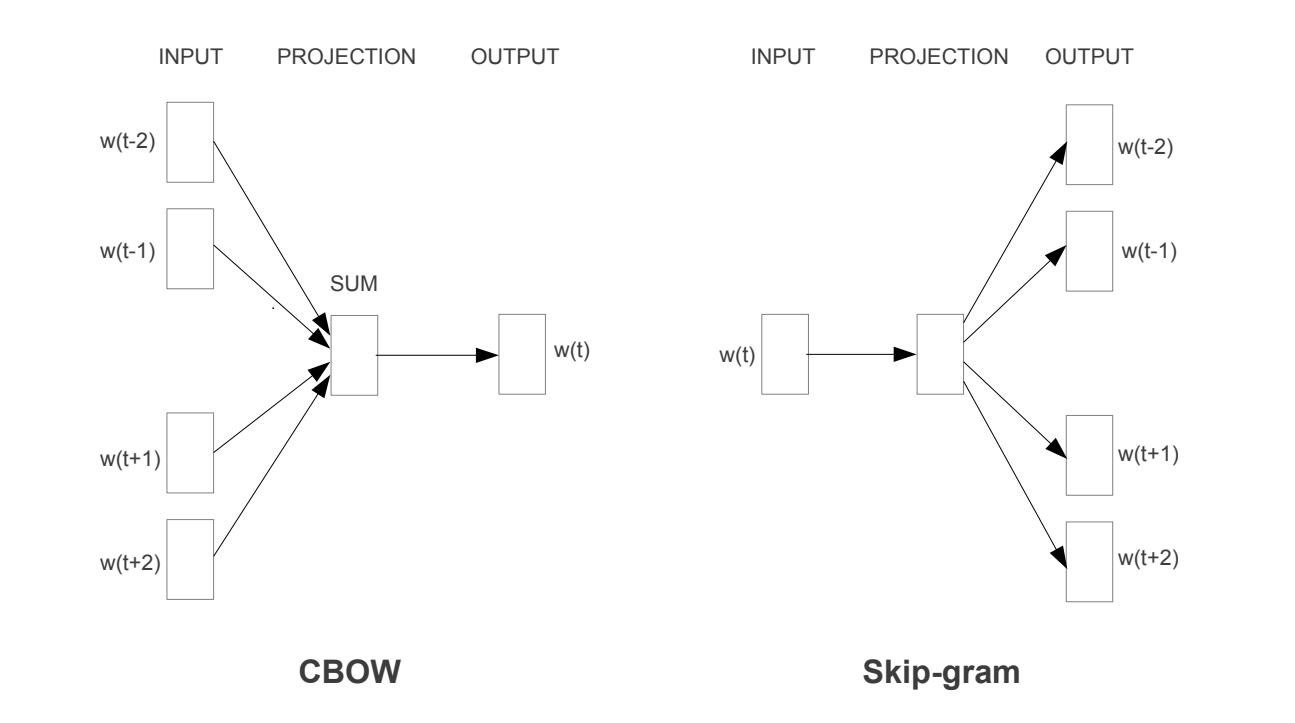

In [13]:
# sg=0 : training with CBOW, sg=1 : training with Skip-gram
Word2Vec_demo = Word2Vec(df_for_w2v.tweet, size=100, iter=5, min_count=3, sg=1)

In [14]:
Word2Vec_demo

In [15]:
(Word2Vec_demo.wv.vectors).shape

(6049, 100)

In [16]:
Word2Vec_demo.wv.vocab

{'The': <gensim.models.keyedvectors.Vocab at 0x1b1ff4e0>,
 'CDC': <gensim.models.keyedvectors.Vocab at 0x1b1ff588>,
 'currently': <gensim.models.keyedvectors.Vocab at 0x1c452828>,
 'reports': <gensim.models.keyedvectors.Vocab at 0x1c452898>,
 'deaths': <gensim.models.keyedvectors.Vocab at 0x1c452a20>,
 'In': <gensim.models.keyedvectors.Vocab at 0x1c452a58>,
 'general': <gensim.models.keyedvectors.Vocab at 0x1c452a90>,
 'the': <gensim.models.keyedvectors.Vocab at 0x1c452ac8>,
 'in': <gensim.models.keyedvectors.Vocab at 0x1c452dd8>,
 'death': <gensim.models.keyedvectors.Vocab at 0x1c452b00>,
 'counts': <gensim.models.keyedvectors.Vocab at 0x1c452940>,
 'between': <gensim.models.keyedvectors.Vocab at 0x1c452c18>,
 'different': <gensim.models.keyedvectors.Vocab at 0x1c452978>,
 'sources': <gensim.models.keyedvectors.Vocab at 0x1c4529b0>,
 'are': <gensim.models.keyedvectors.Vocab at 0x1c452d68>,
 'small': <gensim.models.keyedvectors.Vocab at 0x1c452d30>,
 'and': <gensim.models.keyedvectors.

In [17]:
Word2Vec_demo.wv.get_vector('found')

array([-0.37790594,  0.25178614, -0.25015625,  0.06193734, -0.02622736,
        0.04949442,  0.14849077, -0.29846174, -0.43325028,  0.25066236,
       -0.18275881, -0.3628533 ,  0.25013748, -0.10943056, -0.18671635,
       -0.22082567,  0.21560626, -0.1663268 ,  0.12925372, -0.09161195,
       -0.41486788,  0.2009539 ,  0.12259419,  0.29566625, -0.27154422,
       -0.03853616, -0.24800439, -0.01181509,  0.47284752, -0.58062434,
       -0.36116907,  0.20723794, -0.11019854, -0.17152588,  0.0301386 ,
        0.07203249, -0.02467019, -0.02894994,  0.07250453, -0.12193761,
        0.13700248, -0.05451193,  0.20110337, -0.20926444, -0.05671606,
        0.34711826, -0.19449724,  0.21060102,  0.31932816,  0.12096509,
       -0.04345911,  0.11961421,  0.08567034,  0.0310676 ,  0.0006889 ,
        0.01353536,  0.13037851,  0.00885697, -0.3738768 ,  0.07807399,
        0.33935708, -0.11547631, -0.18201739, -0.13580202, -0.09060465,
        0.01109889, -0.13409397,  0.13783216,  0.2446803 ,  0.08

In [18]:
Word2Vec_demo.wv.similar_by_word('found')

[('patient', 0.9093965291976929),
 ('cured', 0.8788198232650757),
 ('created', 0.8742652535438538),
 ('made', 0.8718529939651489),
 ('Brazil', 0.8673173189163208),
 ('contracted', 0.8664710521697998),
 ('developed', 0.8648313283920288),
 ('dying', 0.8597583770751953),
 ('discovered', 0.8593358397483826),
 ('Italy', 0.8592194318771362)]

In [19]:
Word2Vec_demo.wv.similar_by_word('learn')

[('situations', 0.978007435798645),
 ('limit', 0.9692554473876953),
 ('summer', 0.9688585996627808),
 ('recommendations', 0.9682987332344055),
 ('release', 0.9679379463195801),
 ('Check', 0.9664818048477173),
 ('readily', 0.9663912057876587),
 ('explain', 0.9633677005767822),
 ('gathering', 0.9625636339187622),
 ('Until', 0.9624168276786804)]

In [20]:
Word2Vec_demo.wv.similarity('found', 'learn')

0.56311315

## Load pre-trained model

In [28]:
%% time
model = gensim.models.KeyedVectors.load_word2vec_format('wiki-news-300d-1M-subword.vec')

In [29]:
model.most_similar('dog',topn=10)

[('dogs', 0.8457118272781372),
 ('dogs-', 0.8104538321495056),
 ('puppy', 0.8072682023048401),
 ('dog-', 0.7766374349594116),
 ('dog.', 0.773025631904602),
 ('beagle', 0.7728427648544312),
 ('non-dog', 0.7722827196121216),
 ('dog-owner', 0.770671010017395),
 ('labrador', 0.7675329446792603),
 ('staffy', 0.7621227502822876)]

In [30]:
model.most_similar('car',topn=10)

[('cars', 0.7954456806182861),
 ('vehicle', 0.7870522737503052),
 ('non-car', 0.7825222015380859),
 ('automobile', 0.7791459560394287),
 ('super-car', 0.7760258913040161),
 ('mini-car', 0.7713557481765747),
 ('kit-car', 0.7593867182731628),
 ('side-car', 0.7582603693008423),
 ('motorcar', 0.7560582160949707),
 ('motor-car', 0.7492105960845947)]

## Limitation of pre-trained models

<pre>
model.most_similar(<span style="color:darkred">'KEKW'</span>, topn <span style="color:purple">=</span> <span style="color:green">10</span>)
<span style="color:darkred">KeyError</span>: "word 'KEKW' not in vocabulary"
</pre>

<img src="https://i.imgur.com/rkrGpra.gif" alt="KEKW" />

## How to vectorize the words not in the train set?

<pre>
FT breaks down each word into a bag of n-grams of chars, like

'awesome' => [aw], [awe], [wes], [eso], [som], [ome], [me]
if we set minn = maxn = 3

each subword n-grams are assigned a vector value when an OOV(out of vocabulary) word is encountered FT will try and build a vector by summing up subword vectors that would make up the word, so if you try to get a vector for awme then a vector sum of subwords [aw] and [me] is returned.

This is what makes FT robust in dealing with misspelled words and internet slag.

Also subword vector is not same as word vector [me] != me

you can get your subwords with model.get_subwords('asdhasjhdkajshd')

<p><a href="https://github.com/facebookresearch/fastText/issues/475" target="_blank">reference</a></p>
</pre>
